In [14]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

We have another question for you to answer: when do our users usually commit the labs: in the night, morning, afternoon, or evening? And how has it changed over time?

In [15]:
checkers = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", conn, parse_dates=['timestamp'])
checkers['date'] = checkers['timestamp'].dt.floor('d')
checkers['time'] = pd.to_datetime(checkers['timestamp'].dt.time.astype(str), format='%H:%M:%S.%f')
checkers = checkers.drop('timestamp', axis=1)
checkers

,date,time
0,2020-04-17,1900-01-01 05:19:02.744528
1,2020-04-17,1900-01-01 05:22:35.249331
2,2020-04-17,1900-01-01 05:22:45.549397
3,2020-04-17,1900-01-01 05:34:14.691200
4,2020-04-17,1900-01-01 05:34:24.422370
...,...,...
3202,2020-05-21,1900-01-01 20:19:06.872761
3203,2020-05-21,1900-01-01 20:22:41.785725
3204,2020-05-21,1900-01-01 20:22:41.877806
3205,2020-05-21,1900-01-01 20:37:00.129678


In [16]:
checkers['daytime'] = pd.cut(checkers.time, [pd.to_datetime(h, unit='h', origin=pd.Timestamp('1900-01-01')) 
for h in [0, 4, 10, 17, 24]], right=False, labels=['night', 'morning', 'afternoon', 'evening'], include_lowest=True)

In [17]:
df = checkers.groupby('daytime').date.value_counts().unstack(0)
df.head()

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,NaN,13.0,10.0,NaN
2020-04-18,NaN,1.0,33.0,35.0
2020-04-19,2.0,4.0,16.0,11.0
2020-04-20,NaN,NaN,12.0,13.0
2020-04-21,NaN,NaN,NaN,25.0


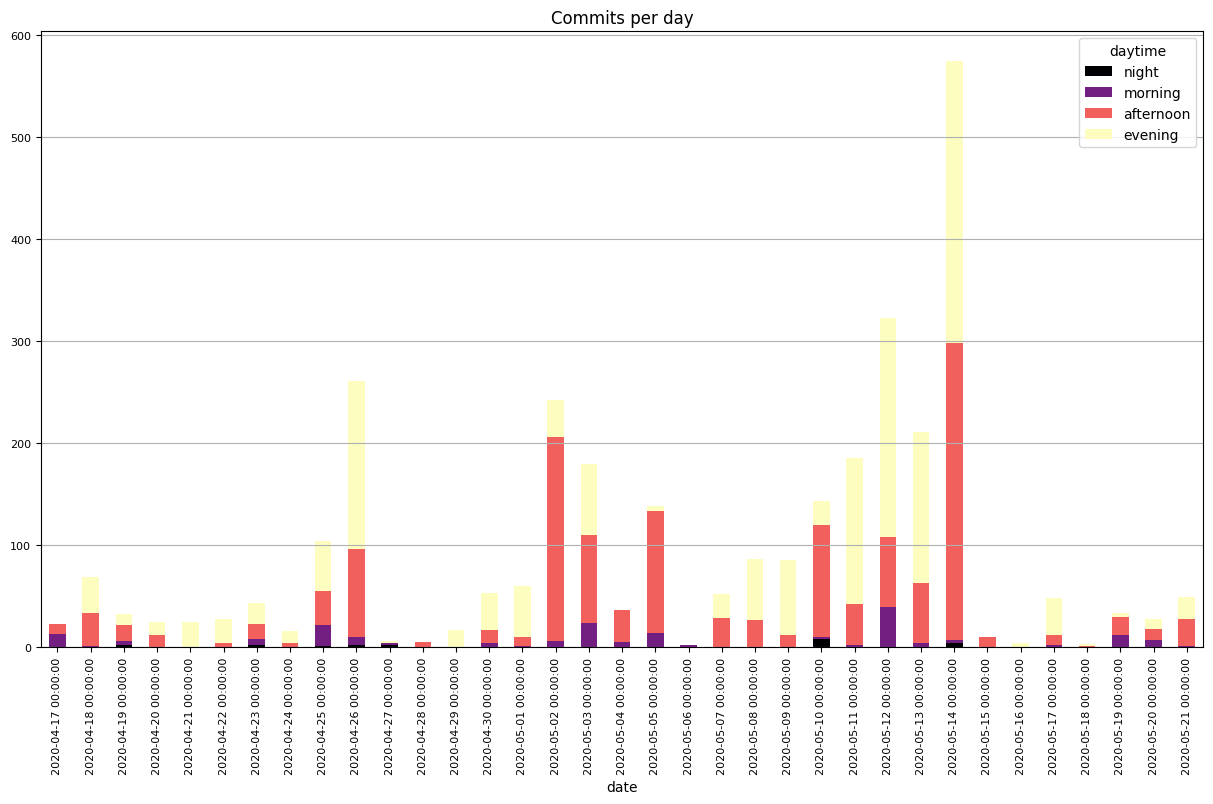

In [18]:
ax = df.plot.bar(stacked=True, figsize=(15, 8), title='Commits per day', rot=90, fontsize=8, colormap='magma')
ax.grid(axis='y')

“When do our users usually commit the labs: in the night, morning, afternoon, or evening?”

Answer: in the afternoon and in the night
Which day has:
∗ the most number of commits
∗ and at the same time, the number of commits in the evening is higher than in the afternoon?

Answer: 2020-05-12